In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_theme(style="darkgrid")

The raw dataset is loaded.Original dataset link: https://www.kaggle.com/ealaxi/paysim1?select=PS_20174392719_1491204439457_log.csv

We can also view the top 5 rows of the dataset

In [20]:
transaction_data = pd.read_csv('datasets/sampled_aml_df_3.csv')

transaction_data.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1577509,155,CASH_OUT,427818.23,C1431817875,198219.00,0.00,C2131020093,0.00,427818.23,0,0
1,3869859,283,CASH_IN,68154.77,C397915380,2884459.21,2952613.98,C105277746,1030035.29,961880.52,0,0
2,5516324,380,CASH_OUT,80828.54,C809484944,0.00,0.00,C226553176,5149991.49,5230820.04,0,0
3,5490462,380,TRANSFER,106069.89,C1857104283,301258.00,195188.11,C1759851095,263816.83,369886.72,0,0
4,5606765,394,PAYMENT,34530.86,C1774638089,200755.00,166224.14,M1074240731,0.00,0.00,0,0


Shape of the dataset is checked

In [4]:
transaction_data.shape

(192500, 12)

Dataset info is obtained.

In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192500 entries, 0 to 192499
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           192500 non-null  int64  
 1   step            192500 non-null  int64  
 2   type            192500 non-null  object 
 3   amount          192500 non-null  float64
 4   nameOrig        192500 non-null  object 
 5   oldbalanceOrg   192500 non-null  float64
 6   newbalanceOrig  192500 non-null  float64
 7   nameDest        192500 non-null  object 
 8   oldbalanceDest  192500 non-null  float64
 9   newbalanceDest  192500 non-null  float64
 10  isFraud         192500 non-null  int64  
 11  isFlaggedFraud  192500 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 17.6+ MB


In [7]:
transaction_data.isnull().sum()

index             0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
transaction_data.describe()

,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.925000e+05,192500.000000,1.925000e+05,1.925000e+05,1.925000e+05,1.925000e+05,1.925000e+05,192500.000000,192500.000000
mean,3.217914e+06,247.825377,2.261676e+05,8.616604e+05,8.270867e+05,1.084274e+06,1.230771e+06,0.038961,0.000083
std,1.861619e+06,147.685363,7.720697e+05,2.912266e+06,2.887263e+06,3.297716e+06,3.575349e+06,0.193503,0.009116
min,2.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.593112e+06,156.000000,1.401661e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.216306e+06,249.000000,8.060089e+04,1.696019e+04,0.000000e+00,1.144710e+05,2.091728e+05,0.000000,0.000000
75%,4.835272e+06,347.000000,2.188217e+05,1.336372e+05,1.290969e+05,9.127214e+05,1.115385e+06,0.000000,0.000000
max,6.362619e+06,743.000000,6.988673e+07,5.958504e+07,4.958504e+07,2.511150e+08,2.506381e+08,1.000000,1.000000


The variable of nameOrig and nameDest consist of a vast amount of unique values.

In [21]:
transaction_data['nameDest'].nunique()

168929

In [22]:
transaction_data['nameOrig'].nunique()

192494

So we are dropping columns not relevant for our analysis

In [23]:
transaction_data = transaction_data.drop(labels = ['index' , 'nameOrig', 'nameDest'], axis = 1)

transaction_data.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85733,232,TRANSFER,262172.47,0.0,0.00,592955.90,855128.37,0,0
138357,308,PAYMENT,17128.52,75377.0,58248.48,0.00,0.00,0,0
167232,279,CASH_OUT,129217.77,145812.0,16594.23,0.00,129217.77,0,0
136184,179,CASH_IN,111173.12,11039.0,122212.12,0.00,0.00,0,0
166562,213,CASH_OUT,495871.56,0.0,0.00,556528.63,1052400.19,0,0


The target variable's category counts are checked. Fraudulent transactions are very less.The dataset is imbalanced

In [24]:
transaction_data['isFraud'].value_counts()

0    185000
1      7500
Name: isFraud, dtype: int64

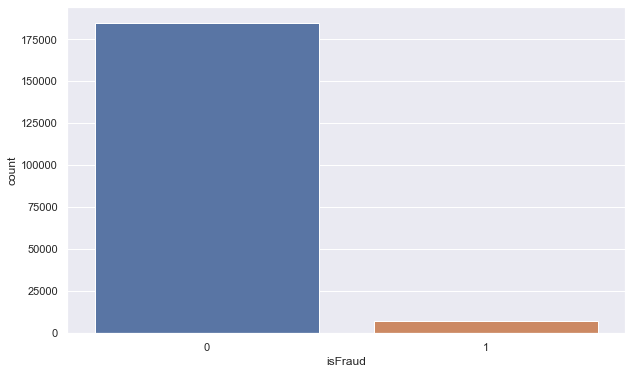

In [25]:
plt.figure(figsize = (10, 6))

sns.countplot(x='isFraud', data = transaction_data);

In [27]:
transaction_data['isFlaggedFraud'].value_counts()

0    192484
1        16
Name: isFlaggedFraud, dtype: int64

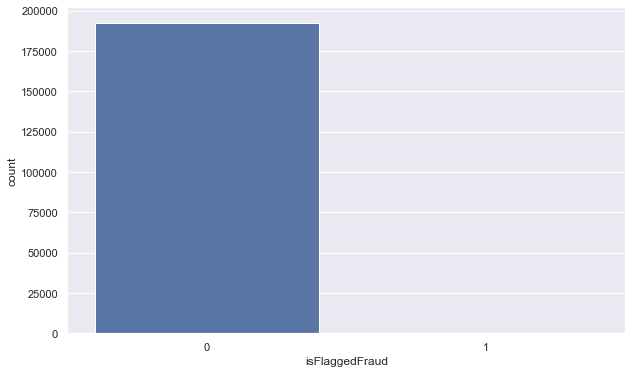

In [28]:
plt.figure(figsize = (10, 6))

sns.countplot(x='isFlaggedFraud', data = transaction_data);

<Figure size 720x432 with 0 Axes>

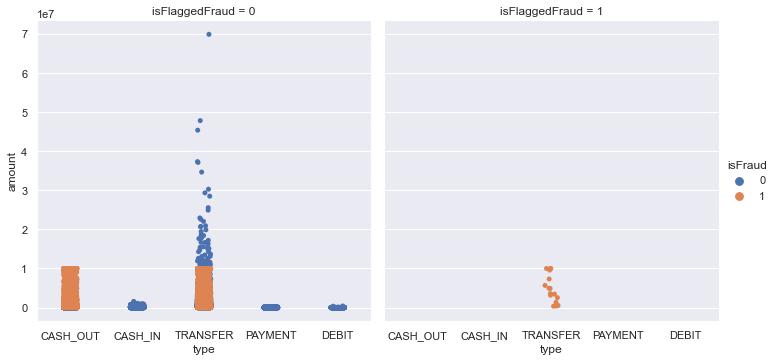

In [57]:
plt.figure(figsize = (10, 6))

sns.catplot(x = 'type', y = 'amount', estimator = sum, 
            hue = 'isFraud' , col = 'isFlaggedFraud',
            data = transaction_data);

Skewness check using skew method of pandas.Most of them are right skewed

In [26]:
transaction_data.skew()

step                0.455818
amount             17.535278
oldbalanceOrg       5.315191
newbalanceOrig      5.304091
oldbalanceDest     17.315701
newbalanceDest     16.842047
isFraud             4.765245
isFlaggedFraud    109.674234
dtype: float64

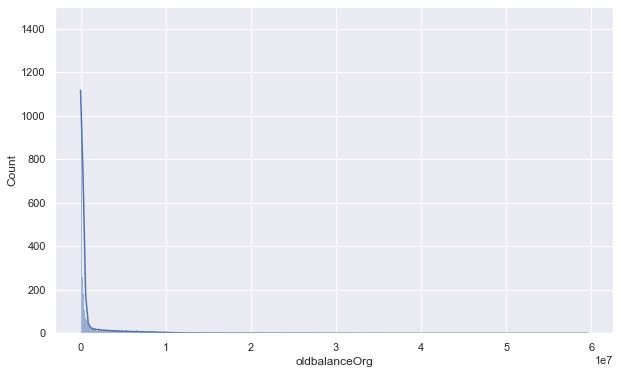

In [32]:
plt.figure(figsize = (10, 6))

plt.ylim([0, 1500])

sns.histplot(transaction_data['oldbalanceOrg'], kde = True);

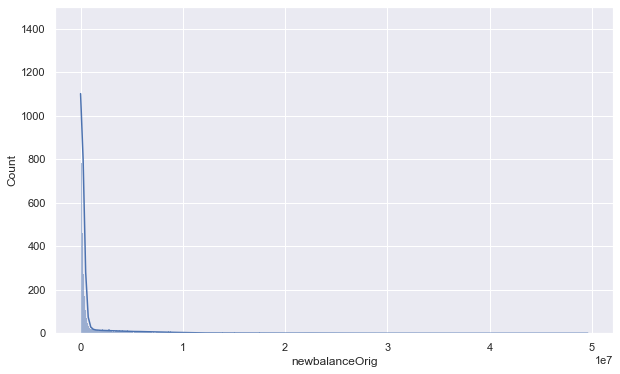

In [36]:
plt.figure(figsize = (10, 6))

plt.ylim([0, 1500])

sns.histplot(transaction_data['newbalanceOrig'], kde = True);

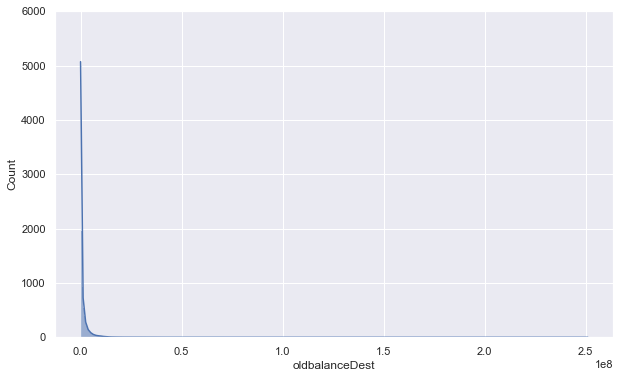

In [38]:
plt.figure(figsize = (10, 6))

plt.ylim([0, 6000])

sns.histplot(transaction_data['oldbalanceDest'], kde = True);

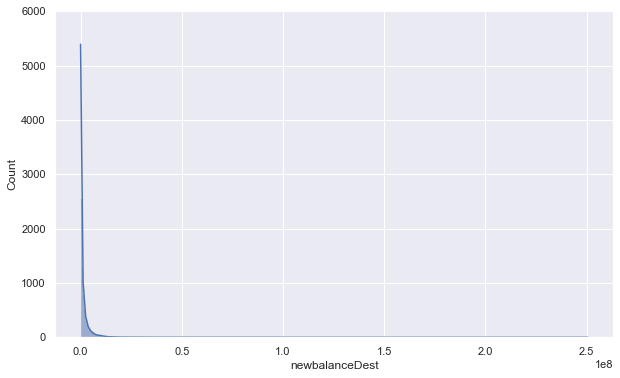

In [37]:
plt.figure(figsize = (10, 6))

plt.ylim([0, 6000])

sns.histplot(transaction_data['newbalanceDest'], kde = True);

Here we are visualising distributions for 'step' and 'amount'. It can be seen that there are spikes at the beginning and in mid-portion. The later part of month seems to have less frequency.

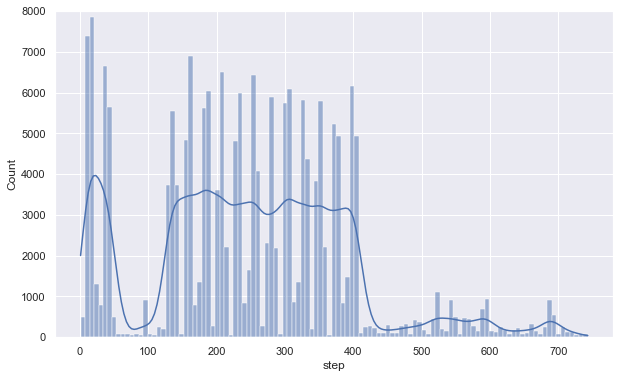

In [39]:
plt.figure(figsize = (10, 6))

plt.ylim([0, 8000])

sns.histplot(transaction_data['step'], kde = True);

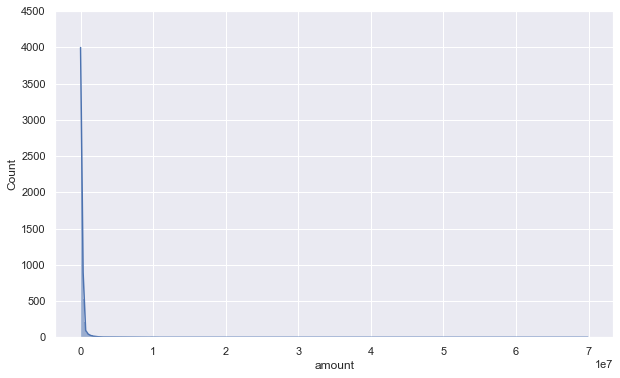

In [42]:
plt.figure(figsize = (10, 6))

plt.ylim([0, 4500])

sns.histplot(transaction_data['amount'], kde = True);

Converting the 'step' variable into hour of the day form using modulus operator

In [43]:
transaction_data['step'] = transaction_data['step'] % 24

transaction_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11,CASH_OUT,427818.23,198219.00,0.00,0.00,427818.23,0,0
1,19,CASH_IN,68154.77,2884459.21,2952613.98,1030035.29,961880.52,0,0
2,20,CASH_OUT,80828.54,0.00,0.00,5149991.49,5230820.04,0,0
3,20,TRANSFER,106069.89,301258.00,195188.11,263816.83,369886.72,0,0
4,10,PAYMENT,34530.86,200755.00,166224.14,0.00,0.00,0,0


Avg Transaction amount for 'Transfer' and 'Cash out' are higher and peaks at around 4.

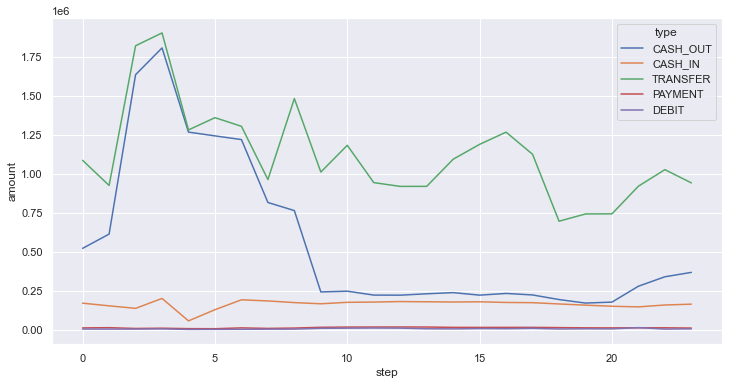

In [46]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = 'step', y = 'amount', hue = 'type', ci = None,
             estimator = 'mean', data = transaction_data);

It can be seen that Fraudulent transactions occurs uniformly throughout the day but most of the Genuine Transactions are happening starting from 9 to end of the day.So early day transactions (0 to 9) has higher probability of being fraud

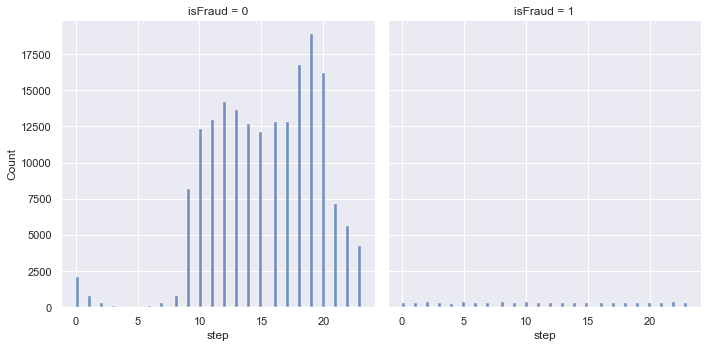

In [50]:
sns.displot(data = transaction_data, x = 'step', col = 'isFraud');

Fraudulent transactions are occuring only in 'CASH OUT' and 'TRANSFER" type transactions. It can seen also that cash out and transfer counts for Fraudulent transactions are nearly equal.

<AxesSubplot:xlabel='type', ylabel='count'>

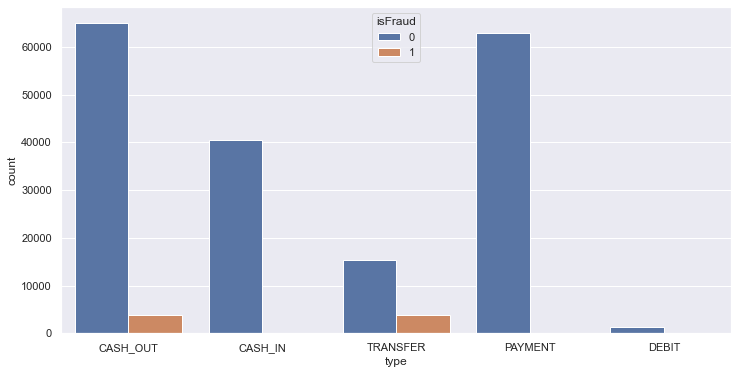

In [51]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'type', hue = 'isFraud', data = transaction_data)

The Transaction values for each type is shown. The TRANSFER type is having Highest Values and DEBIT type is lowest

<AxesSubplot:xlabel='type', ylabel='amount'>

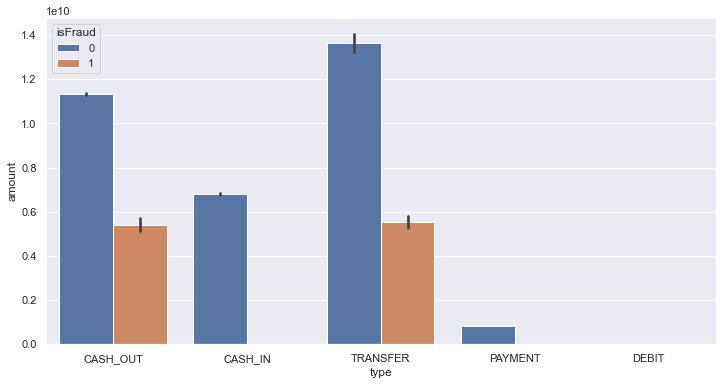

In [53]:
plt.figure(figsize = (12, 6))

sns.barplot(x = 'type', y = 'amount', estimator = sum, hue = 'isFraud', data = transaction_data);

It can be seen that Amount(Transaction) of Fraudulent Transactions are limited to 10000000.

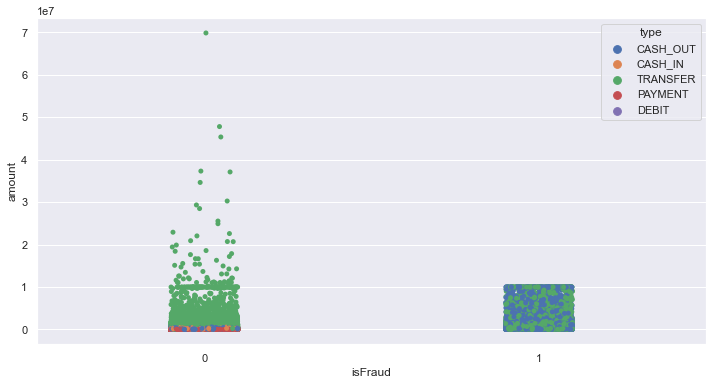

In [55]:
plt.figure(figsize = (12, 6))

sns.stripplot(x = 'isFraud', y = 'amount', hue = 'type', data = transaction_data);

With the help of correlation matrix, Heatmap is drawn for finding out any associations between the continuous variables.Very High correlation observed between 'NewbalanceOrig' and 'OldbalanceOrg'.
'newbalanceDest' and 'oldbalanceDest' also have very high correlation

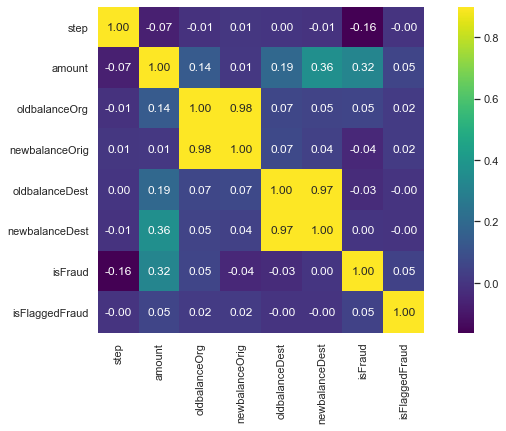

In [58]:
corrmat = transaction_data.corr()

ax = plt.subplots(figsize = (12, 6))

sns.heatmap(corrmat, vmax = 0.9, square = True, annot = True, fmt = '0.2f', cmap = 'viridis');

It can be seen that Frauds occur only for 'TRANSFER' and 'CASH OUT' type Transactions.So we are not taking other types of Transactions for our analysis

In [59]:
transaction_data = transaction_data.loc[(transaction_data.type == 'TRANSFER') | \
                                        (transaction_data.type == 'CASH_OUT')]

transaction_data.shape

(87998, 9)

We are converting the 'type' variable into numeric form using 'get_dummies' method from pandas

In [60]:
transaction_data = pd.concat([transaction_data, 
                              pd.get_dummies(transaction_data['type'],
                                             prefix = 'type', drop_first = True)], 
                              axis = 1)

transaction_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_TRANSFER
0,11,CASH_OUT,427818.23,198219.0,0.00,0.00,427818.23,0,0,0
2,20,CASH_OUT,80828.54,0.0,0.00,5149991.49,5230820.04,0,0,0
3,20,TRANSFER,106069.89,301258.0,195188.11,263816.83,369886.72,0,0,1
6,18,CASH_OUT,402832.90,11665.0,0.00,28550.98,431383.87,0,0,0
12,22,CASH_OUT,34643.49,0.0,0.00,346081.41,380724.90,0,0,0


Further, Non-relevant variables are removed from the analyis

In [61]:
transaction_data = transaction_data.drop(labels = ['type','isFlaggedFraud'], axis = 1)

transaction_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_TRANSFER
0,11,427818.23,198219.0,0.00,0.00,427818.23,0,0
2,20,80828.54,0.0,0.00,5149991.49,5230820.04,0,0
3,20,106069.89,301258.0,195188.11,263816.83,369886.72,0,1
6,18,402832.90,11665.0,0.00,28550.98,431383.87,0,0
12,22,34643.49,0.0,0.00,346081.41,380724.90,0,0


In [71]:
transaction_data['isFraud'].value_counts()

0    80498
1     7500
Name: isFraud, dtype: int64

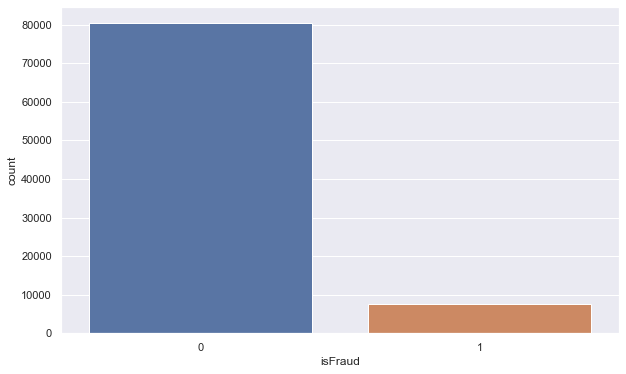

In [70]:
plt.figure(figsize = (10, 6))

sns.countplot(x='isFraud', data = transaction_data);

Here, We have created two new features based on the discrepancies in Bank account following transaction of amount

In [62]:
transaction_data['origBalanceDiscrepancy'] = \
    transaction_data.newbalanceOrig + transaction_data.amount - transaction_data.oldbalanceOrg

transaction_data['destBalanceDiscrepancy'] = \
    transaction_data.oldbalanceDest + transaction_data.amount - transaction_data.newbalanceDest

It can be seen from the strip plot that this plot is quite similar to the 'isFraud'vs 'Orig_Acct_Bal_discrepancy' strip plot.

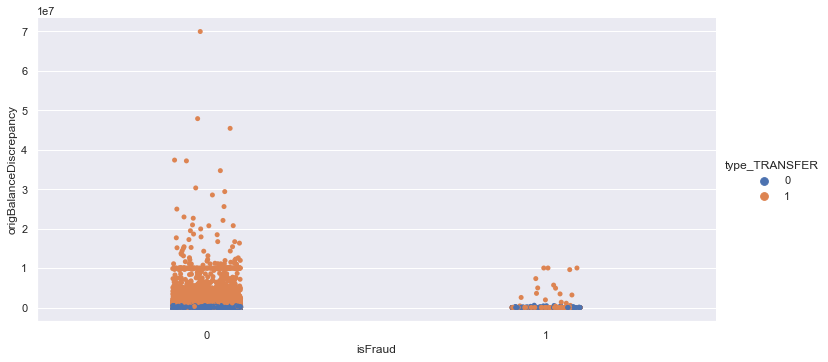

In [63]:
sns.catplot(x = 'isFraud', y = 'origBalanceDiscrepancy', estimator = sum, 
            hue = 'type_TRANSFER', data = transaction_data, aspect = 2)

But this plot is quite different from the above plot as for fraudulent transactions, the discrepancy amount for destination account is grouped together in High ranges.

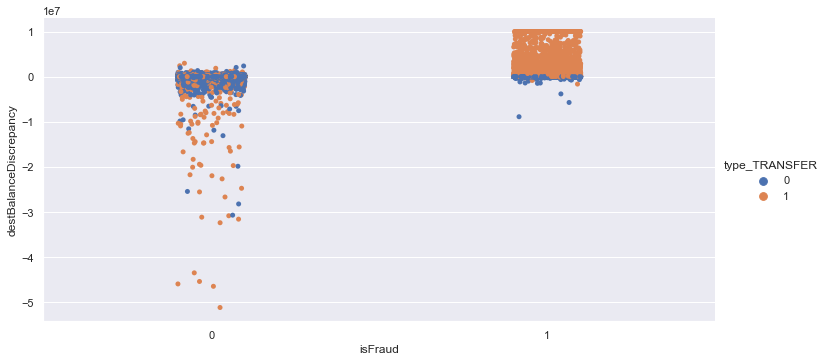

In [65]:
sns.catplot(x = 'isFraud', y = 'destBalanceDiscrepancy', estimator = sum,
            hue = 'type_TRANSFER' , data = transaction_data, aspect = 2)

In [69]:
transaction_data.to_csv('datasets/preprocessed_transaction_data.csv', index=False)